# Project 8: Machine Learning for Predictive Analytics

## Packages and setup

In [83]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

## Reading data and initial processing

In [84]:
url = 'https://raw.githubusercontent.com/saumyapanda17/Telecom-Data/main/Telecom%20Data.csv'
cust_df = pd.read_csv(url)
cust_df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


## Placeholder for analysis

In [85]:
#Dimension of cust_df
print( cust_df.shape )

display(cust_df.describe())

#Count of Unique values form Churn Col:
cust_df['Churn'].value_counts()

#Printing % of Unique values from Churn Column:
per_uniq = ( cust_df.Churn.value_counts() / cust_df.shape[0] )*100
display(per_uniq)

(51047, 58)


,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,5.104700e+04,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50680.000000,50680.000000,51047.000000,...,51046.000000,51046.000000,51046.000000,50138.000000,50138.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,3.201957e+06,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,6.011489,...,1.805646,1.558751,380.545841,31.338127,21.144142,0.037201,0.018277,0.052070,4.324524,0.053911
std,1.169056e+05,44.507336,529.871063,23.848871,2.228546,96.588076,9.818294,257.514772,39.574915,9.043955,...,1.331173,0.905932,253.801982,22.094635,23.931368,0.206483,0.142458,0.307592,3.138236,0.383147
min,3.000002e+06,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,...,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100632e+06,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,0.700000,...,1.000000,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.201534e+06,48.460000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,...,1.000000,1.000000,329.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,3.305376e+06,71.065000,723.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,7.700000,...,2.000000,2.000000,515.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,3.399994e+06,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,...,24.000000,15.000000,1812.000000,99.000000,99.000000,4.000000,3.000000,35.000000,9.000000,25.000000


No     36336
Yes    14711
Name: Churn, dtype: int64

No     71.18146
Yes    28.81854
Name: Churn, dtype: float64

## Q1. Detect and resolve problems in the data (Missing value, Outliers, Unexpected value, etc.)

### Q1.1 How many customers had zero monthly revenue?

In [86]:
cust_df[cust_df.MonthlyRevenue == 0]

cust_df = cust_df[cust_df.MonthlyRevenue > 0.0]  # including only those records where monthly revenue is more than 0

cust_df = cust_df[cust_df.MonthlyMinutes > 0.0] # # including only those records where monthly minutes is more than 0

cust_df.shape

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
12262,3096670,Yes,0.0,2.0,0.0,0.0,0.0,0.0,NaN,NaN,...,0,0,No,0,30,No,5-Low,Suburban,Other,Unknown
13127,3103410,Yes,0.0,55.0,0.0,0.0,0.0,0.0,NaN,NaN,...,0,4,No,0,10,No,4-Medium,Other,Other,Unknown
42051,3334666,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,No,0,Unknown,No,5-Low,Other,Other,Unknown
49920,3391282,No,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,4,No,1,30,No,1-Highest,Suburban,Other,Yes
49946,3391442,No,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,5,No,0,Unknown,No,1-Highest,Other,Other,Unknown
51035,3399894,No,0.0,76.0,30.0,0.0,0.0,0.0,0.0,0.0,...,0,4,No,0,Unknown,No,2-High,Other,Professional,No


(50162, 58)

### Q1.2 How many columns has missing values percentage > 5%

In [87]:
per_miss = ( cust_df.isnull().sum() * 100 ) / cust_df.shape[0]
print(per_miss)

#Converting this to DF:
df_per_mis = pd.DataFrame( { 'column_name' : cust_df.columns,
                             'mis_val_per' : per_miss } )
df_per_mis

cust_df.dropna( axis = 0, inplace = True)
cust_df.shape

CustomerID                   0.000000
Churn                        0.000000
MonthlyRevenue               0.000000
MonthlyMinutes               0.000000
TotalRecurringCharge         0.000000
DirectorAssistedCalls        0.000000
OverageMinutes               0.000000
RoamingCalls                 0.000000
PercChangeMinutes            0.344883
PercChangeRevenues           0.344883
DroppedCalls                 0.000000
BlockedCalls                 0.000000
UnansweredCalls              0.000000
CustomerCareCalls            0.000000
ThreewayCalls                0.000000
ReceivedCalls                0.000000
OutboundCalls                0.000000
InboundCalls                 0.000000
PeakCallsInOut               0.000000
OffPeakCallsInOut            0.000000
DroppedBlockedCalls          0.000000
CallForwardingCalls          0.000000
CallWaitingCalls             0.000000
MonthsInService              0.000000
UniqueSubs                   0.000000
ActiveSubs                   0.000000
ServiceArea 

,column_name,mis_val_per
CustomerID,CustomerID,0.000000
Churn,Churn,0.000000
MonthlyRevenue,MonthlyRevenue,0.000000
MonthlyMinutes,MonthlyMinutes,0.000000
TotalRecurringCharge,TotalRecurringCharge,0.000000
DirectorAssistedCalls,DirectorAssistedCalls,0.000000
OverageMinutes,OverageMinutes,0.000000
RoamingCalls,RoamingCalls,0.000000
PercChangeMinutes,PercChangeMinutes,0.344883
PercChangeRevenues,PercChangeRevenues,0.344883


(49078, 58)

<mark>__Result:__
    
Missing values are present in 5 columns, but all are less than 5%.

### Q1.3 For columns, "UniqueSubs" and "DirectorAssistedCalls" remove outliers, if any

## Removing outliers

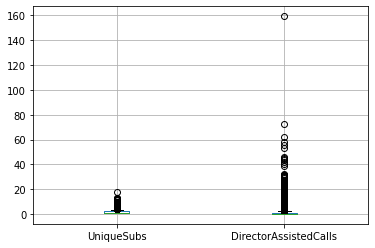

In [88]:
#plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
cols=[ "UniqueSubs","DirectorAssistedCalls" ]
cust_df.boxplot( column=cols )

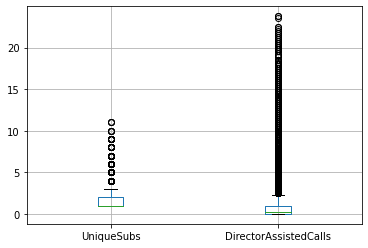

In [89]:
Q1 = cust_df[cols].quantile(0.01)
Q3 = cust_df[cols].quantile(0.99)
IQR = Q3 - Q1
cust_df = cust_df[~((cust_df[cols] < (Q1 - 1.5 * IQR)) |(cust_df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols)

## Q2. Perform exploratory analysis to analyze customer churn

### Q2.1 Does customers with high overage minutes also have high revenue?

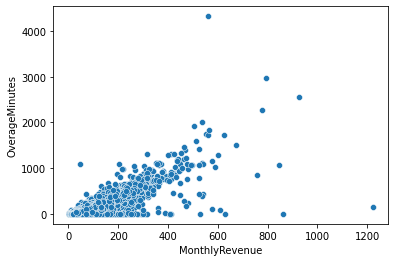

In [90]:
sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = cust_df)

In [91]:
#use scatter plot to find the correlation between monthly revenue and overage minutes
column_1 = cust_df["MonthlyRevenue"]
column_2 = cust_df["OverageMinutes"]
correlation = column_1.corr(column_2)
print(correlation)

0.7899213344499376


<mark>__Result:__
    
**Positive correlation**
Yes, customers with high overage minutes also have high revenue. This can be interpreted from the positive slope graph.

### Q2.2 Does high number of active subscribers lead to low monthly revenue?

1     34924
2     11725
3      1799
4       403
5       134
0        37
6         6
8         2
11        1
Name: ActiveSubs, dtype: int64


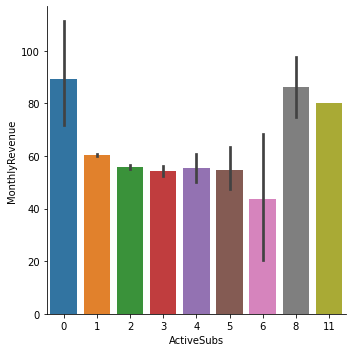

In [92]:
print(cust_df['ActiveSubs'].value_counts())
sns.catplot( x = 'ActiveSubs', y = 'MonthlyRevenue', data = cust_df, kind = 'bar' ) 

<mark>__Result:__
    
Yes, high number of active subscribers lead to low monthly revenue.

### Q2.3 Does credit rating have an impact in churn rate?

In [93]:
print(cust_df['CreditRating'].value_counts())
pd.crosstab( cust_df.Churn, cust_df.CreditRating).apply( lambda r : r/r.sum(), axis = 0)
pd.crosstab( cust_df.Churn, cust_df.CreditRating).apply( lambda r : r/r.sum(), axis = 1)

2-High       18460
1-Highest     8209
3-Good        8101
5-Low         6234
4-Medium      5164
7-Lowest      2002
6-VeryLow      861
Name: CreditRating, dtype: int64


CreditRating,1-Highest,2-High,3-Good,4-Medium,5-Low,6-VeryLow,7-Lowest
Churn,,,,,,,
No,0.697771,0.703792,0.697692,0.745933,0.786654,0.738676,0.719281
Yes,0.302229,0.296208,0.302308,0.254067,0.213346,0.261324,0.280719


CreditRating,1-Highest,2-High,3-Good,4-Medium,5-Low,6-VeryLow,7-Lowest
Churn,,,,,,,
No,0.162709,0.369049,0.160550,0.109419,0.139302,0.018066,0.040904
Yes,0.179432,0.395458,0.177117,0.094887,0.096189,0.016273,0.040645


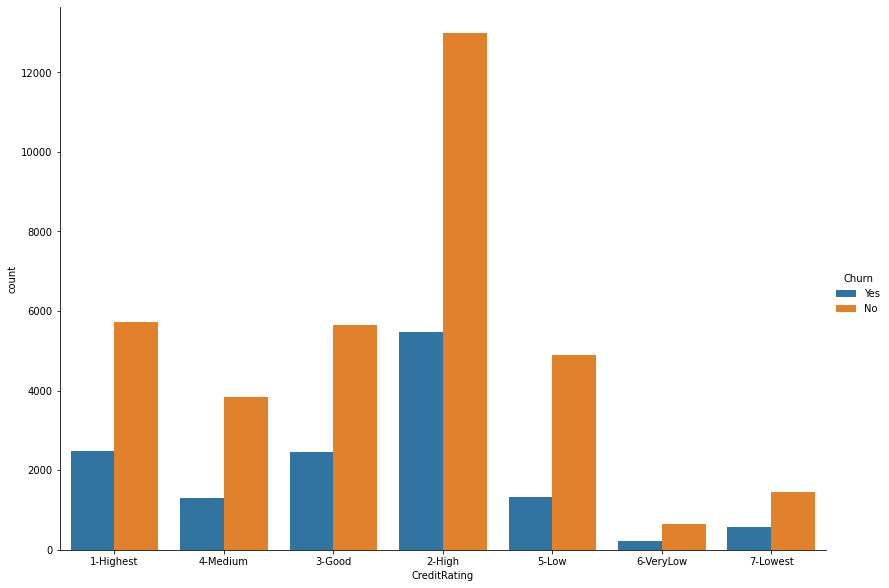

In [94]:
sns.catplot(x = 'CreditRating', kind = 'count', hue = "Churn", data = cust_df, height=8.27, aspect=11.7/8.27)

<mark>__Result:__
    
Credit rating doesnt'have an impact in churn rate.

### Placeholder for additional exploratory analysis

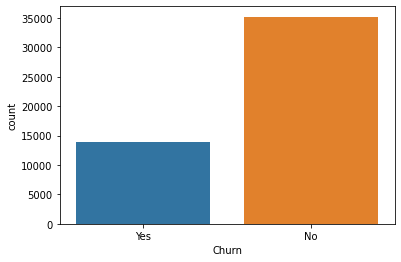

In [95]:
sns.countplot(x=cust_df.Churn)

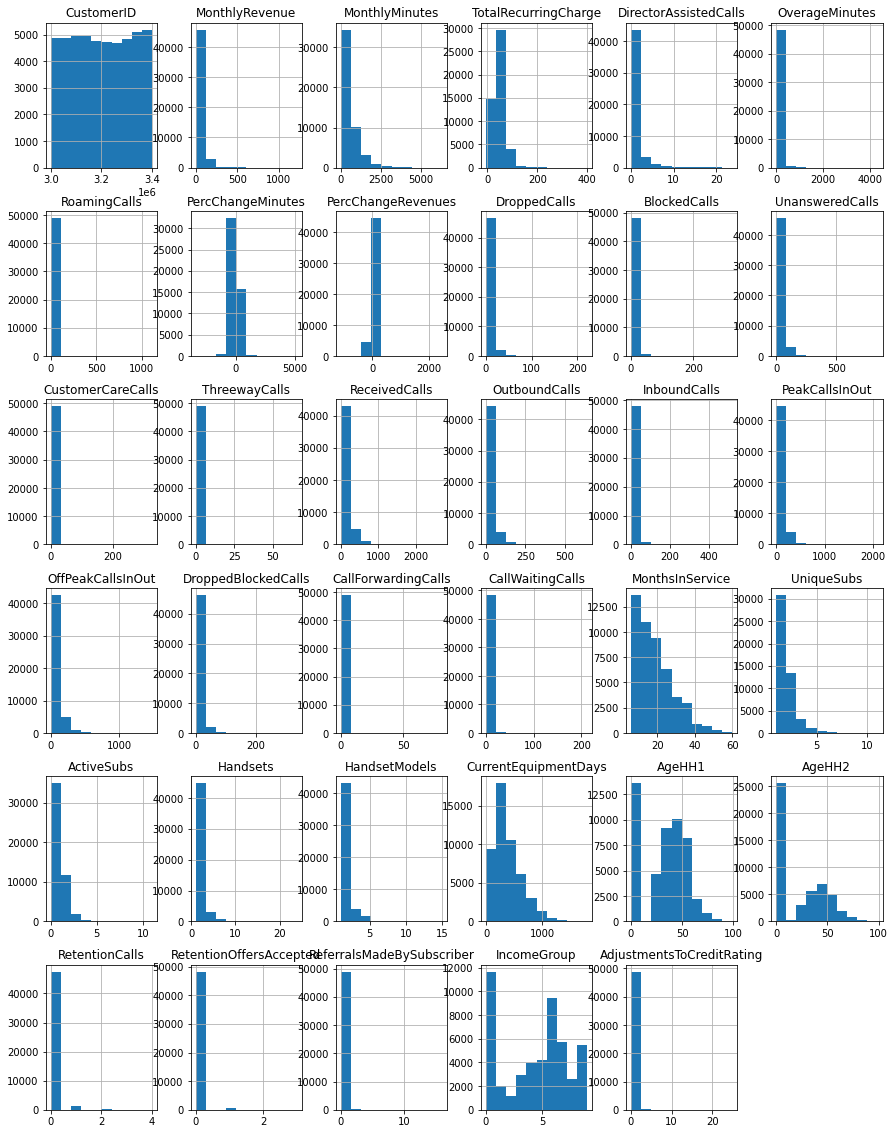

In [96]:
#Axis Comparison for all columns
fig = plt.figure( figsize = (15,20) )
ax = fig.gca()
cust_df[1:].hist(ax=ax);

In [97]:
cust_df.select_dtypes(float).columns

Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays',
       'AgeHH1', 'AgeHH2'],
      dtype='object')

In [98]:
cust_df.select_dtypes(int).columns

Index(['CustomerID', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'RetentionCalls', 'RetentionOffersAccepted',
       'ReferralsMadeBySubscriber', 'IncomeGroup',
       'AdjustmentsToCreditRating'],
      dtype='object')

In [99]:
cust_df.select_dtypes(object).columns

Index(['Churn', 'ServiceArea', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'OwnsMotorcycle', 'HandsetPrice',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatus'],
      dtype='object')

## Q3. Create additional features to help predict churn

In [100]:
#wrapper function to create additional features for churn prediction
def create_features(cust_df):
    
    #3.1 Percent of current active subs over total subs
    cust_df['perc_active_subs'] = cust_df['ActiveSubs'] / cust_df['UniqueSubs']
    
    #3.2 Percent of recurrent charge to monthly charge
    cust_df['perc_recurrent_charge']= cust_df['TotalRecurringCharge'] / cust_df["MonthlyRevenue"]
    
    #3.3 Percent of overage minutes over total monthly minutes
    cust_df['perc_overage_minute']= cust_df['OverageMinutes'] / cust_df["MonthlyMinutes"]
  
    #3.4 Percent of RoamingCalls minutes over total monthly minutes
    cust_df['perc_Roaming_Calls']= cust_df['RoamingCalls'] / cust_df["MonthlyMinutes"]
   
    #3.5 Percent of DroppedCalls minutes over total monthly minutes
    cust_df['perc_Dropped_Calls']= cust_df['DroppedCalls'] / cust_df["MonthlyMinutes"]
    
    #3.6 Percent of BlockedCalls minutes over total monthly minutes
    cust_df['perc_Blocked_Calls ']= cust_df['BlockedCalls'] / cust_df["MonthlyMinutes"]
    
    #3.7 Percent of UnansweredCalls minutes over total monthly minutes
    cust_df['perc_Unanswered_Calls']= cust_df['UnansweredCalls'] / cust_df["MonthlyMinutes"]
    
    #3.8 Percent of CustomerCareCalls minutes over total monthly minutes
    cust_df['perc_Customer_Care_Calls']= cust_df['CustomerCareCalls'] / cust_df["MonthlyMinutes"]
    
    #3.9 Percent of ThreewayCalls minutes over total monthly minutes
    cust_df['perc_Threeway_Calls']= cust_df['ThreewayCalls'] / cust_df["MonthlyMinutes"]

    #3.10 Percent of ReceivedCalls minutes over total monthly minutes
    cust_df['perc_Received_Calls']= cust_df['ReceivedCalls'] / cust_df["MonthlyMinutes"]
    
    #3.11 Percent of OutboundCalls minutes over total monthly minutes
    cust_df['perc_OutboundCalls']= cust_df['OutboundCalls'] / cust_df["MonthlyMinutes"]
    
    #3.12 Percent of InboundCalls minutes over total monthly minutes
    cust_df['perc_Inbound_Calls']= cust_df['InboundCalls'] / cust_df["MonthlyMinutes"]
    
    #3.13 Percent of PeakCallsInOut minutes over total monthly minutes
    cust_df['perc_PeakCalls_InOut']= cust_df['PeakCallsInOut'] / cust_df["MonthlyMinutes"]

   #3.14 Percent of OffPeakCallsInOut minutes over total monthly minutes
    cust_df['perc_Off_PeakCalls_InOut']= cust_df['OffPeakCallsInOut'] / cust_df["MonthlyMinutes"]
    
    #3.15 Percent of OffPeakCallsInOut minutes over total monthly minutes
    cust_df['perc_Off_PeakCalls_InOut']= cust_df['OffPeakCallsInOut'] / cust_df["MonthlyMinutes"]
    
    return cust_df

In [101]:
cust_df = create_features(cust_df)
cust_df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,perc_Dropped_Calls,perc_Blocked_Calls,perc_Unanswered_Calls,perc_Customer_Care_Calls,perc_Threeway_Calls,perc_Received_Calls,perc_OutboundCalls,perc_Inbound_Calls,perc_PeakCalls_InOut,perc_Off_PeakCalls_InOut
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0.003196,0.003196,0.028767,0.000000,0.000000,0.443836,0.000000,0.000000,0.264840,0.109589
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0.030000,0.000000,0.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.100000
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.037500,0.000000,0.162500,0.462500
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0.039634,0.005869,0.057927,0.003277,0.000991,0.152668,0.282241,0.112043,0.423552,0.231479
5,3000030,No,38.05,682.0,52.0,0.25,0.0,0.0,148.0,-3.1,...,0.013196,0.002493,0.019062,0.001026,0.000000,0.061877,0.009824,0.000000,0.048827,0.077713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51033,3399882,Yes,38.34,320.0,30.0,0.99,21.0,0.0,-66.0,-8.3,...,0.038437,0.007187,0.070938,0.004063,0.000000,0.309375,0.071875,0.011562,0.424062,0.350938
51037,3399906,No,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,...,0.011111,0.000000,0.138095,0.000000,0.000000,0.222222,0.000000,0.000000,0.253968,0.233333
51040,3399942,No,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,...,0.019751,0.001381,0.032182,0.000000,0.002348,0.096961,0.035497,0.000414,0.361878,0.017541
51041,3399946,Yes,117.49,384.0,30.0,0.00,250.0,0.0,0.0,0.0,...,0.010417,0.002604,0.070312,0.000000,0.000000,0.056510,0.003385,0.000000,0.258594,0.141406


## Q4. Build classification model to predict customer churn month in advance

### Initial data processing for model building exercise

In [102]:
cust_df.ServiceArea.nunique()

741

In [103]:
for i in list( cust_df.select_dtypes(object).columns):
    print( i, cust_df[i].nunique() )

Churn 2
ServiceArea 741
ChildrenInHH 2
HandsetRefurbished 2
HandsetWebCapable 2
TruckOwner 2
RVOwner 2
Homeownership 2
BuysViaMailOrder 2
RespondsToMailOffers 2
OptOutMailings 2
NonUSTravel 2
OwnsComputer 2
HasCreditCard 2
NewCellphoneUser 2
NotNewCellphoneUser 2
OwnsMotorcycle 2
HandsetPrice 16
MadeCallToRetentionTeam 2
CreditRating 7
PrizmCode 4
Occupation 8
MaritalStatus 3


In [104]:
#Creating Dummy Variables for all Categorical values:
cust_df.select_dtypes(object).columns

X = pd.get_dummies( cust_df.drop( ['ServiceArea'], axis = 1 ) )

Index(['Churn', 'ServiceArea', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'OwnsMotorcycle', 'HandsetPrice',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatus'],
      dtype='object')

In [105]:
X.shape

(49031, 121)

In [106]:
#Dropping the Columns
X.drop(['Churn_No','ChildrenInHH_No','HandsetRefurbished_No','HandsetWebCapable_No','TruckOwner_No','RVOwner_No','Homeownership_Unknown','BuysViaMailOrder_No', 'RespondsToMailOffers_No', 'OptOutMailings_No',
       'NonUSTravel_No', 'OwnsComputer_No', 'HasCreditCard_No', 'NewCellphoneUser_No','NotNewCellphoneUser_No', 'OwnsMotorcycle_No','MadeCallToRetentionTeam_No','MaritalStatus_No'],axis=1,inplace = True)
X.shape

(49031, 103)

In [107]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [108]:
import imblearn
print(imblearn.__version__)

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

0.8.1


In [109]:
#Train - test split to train and test model accuracy
from sklearn.model_selection import train_test_split

x = X.drop( ['Churn_Yes'], axis = 1 )
y = X['Churn_Yes']

print( Counter(y) )

Counter({0: 35204, 1: 13827})


In [110]:
oversample = RandomOverSampler( sampling_strategy = 'minority' )
#This would make the minority class of the same length as the majority class.
X_over, y_over = oversample.fit_resample( x, y )
print( Counter(y_over) )

Counter({1: 35204, 0: 35204})


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=0)

print( X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)


#Feature scaling for all continuous variable
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() #Fit and Transform on Input Data.
X_train = sc.fit_transform(X_train)
print( X_train.shape)
X_test = sc.fit_transform(X_test)
print(X_test.shape)

#Create dummy variables for all categorical variables
#X = pd.get_dummies(X)

(49285, 102)
(49285,)
(21123, 102)
(21123,)
(49285, 102)
(21123, 102)


### Q4.1 Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set


In [112]:
#-------------------------------- Model training -------------------------------#

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression( random_state = 0)
lr.fit( X_train, y_train )

LogisticRegression(random_state=0)

In [113]:
#-------------------------------- Model testing ---------------------------------#


y_pred = lr.predict(X_test)
df_pred = pd.DataFrame(lr.predict_proba(X_test))
df_pred['Final Pred'] = y_pred

df_pred['Pred_70%'] = np.where(lr.predict_proba(X_test)[:,1]>0.7, 1, 0)  # if more than 70% then 1 else 0

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)   # actual values, predicted values

print("Confusion matrix: \n", cm)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion matrix: 
 [[6302 4238]
 [4450 6133]]
Accuracy: 0.5886947876722056
              precision    recall  f1-score   support

           0       0.59      0.60      0.59     10540
           1       0.59      0.58      0.59     10583

    accuracy                           0.59     21123
   macro avg       0.59      0.59      0.59     21123
weighted avg       0.59      0.59      0.59     21123



In [114]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
(tn,fp,fn,tp)

(6302, 4238, 4450, 6133)

In [115]:
print('Precsion from Logistic Regression is:', (tp)/(tp+fp))
print('Recall from Logistic Regression is:', (tp)/(tp+fn))
print('Accuracy from Logistic Regression is:',(tp+tn)/(tp+tn+fp+fn))

df_pred.head()

Precsion from Logistic Regression is: 0.5913605245395815
Recall from Logistic Regression is: 0.579514315411509
Accuracy from Logistic Regression is: 0.5886947876722056


,0,1,Final Pred,Pred_70%
0,0.542351,0.457649,0,0
1,0.507790,0.492210,0,0
2,0.750988,0.249012,0,0
3,0.541237,0.458763,0,0
4,0.512777,0.487223,0,0


In [116]:
df_pred[df_pred[1] >= 0.7].head()

,0,1,Final Pred,Pred_70%
29,0.237211,0.762789,1,1
33,0.293010,0.706990,1,1
38,0.240741,0.759259,1,1
39,0.287284,0.712716,1,1
44,0.272815,0.727185,1,1


### Q4.2 Build Random Forest classifier to compare model accuracy over the logistic regression model


In [117]:
#-------------------------------- Model training -------------------------------#

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train,y_train)



RandomForestClassifier(n_estimators=50)

In [118]:
#-------------------------------- Model testing ---------------------------------#

y_pred1 = rf.predict(X_test)
df_pred1 = pd.DataFrame(rf.predict_proba(X_test))
df_pred1['Final_Pred'] = y_pred1

df_pred1['Pred_70%']=np.where(rf.predict_proba(X_test)[:,1]>0.7,1,0) # if probability is greater than 0.7 then it is assigned 1 or else 0

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test,y_pred1)

print("Confusion Matrix : \n", cm)
print('Accuracy', accuracy_score(y_test,y_pred1))
print(classification_report(y_test, y_pred1))

Confusion Matrix : 
 [[9234 1306]
 [1614 8969]]
Accuracy 0.8617620603134024
              precision    recall  f1-score   support

           0       0.85      0.88      0.86     10540
           1       0.87      0.85      0.86     10583

    accuracy                           0.86     21123
   macro avg       0.86      0.86      0.86     21123
weighted avg       0.86      0.86      0.86     21123



In [119]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred1).ravel()
print('Precision from Random Forest Classifier is:', (tp)/(tp+fp))
print('Recall from Random Forest Classifier is:', (tp)/(tp+fn))
print('Accuracy from Random Forest Classifier is:',(tp+tn)/(tp+tn+fp+fn))

Precision from Random Forest Classifier is: 0.8728953771289538
Recall from Random Forest Classifier is: 0.8474912595672305
Accuracy from Random Forest Classifier is: 0.8617620603134024


## Finding model with the best accuracy

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier

lr=LogisticRegression(C = 0.1, random_state = 42, solver = 'liblinear')
dt=DecisionTreeClassifier()
rm=RandomForestClassifier()
gnb=GaussianNB()
xgb = XGBClassifier()


In [121]:
for a,b in zip([lr,dt,rm,gnb,xgb],["Logistic Regression","Decision Tree","Random Forest","Naive Bayes", "XGBoost"]):
    a.fit(X_train,y_train)
    prediction=a.predict(X_train)
    y_pred=a.predict(X_test)
    score1=accuracy_score(y_train,prediction)
    score=accuracy_score(y_test,y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    msg2="[%s] test data accuracy is : %f" % (b,score)
    print(msg1)
    print(msg2)

LogisticRegression(C=0.1, random_state=42, solver='liblinear')

[Logistic Regression] training data accuracy is : 0.591153
[Logistic Regression] test data accuracy is : 0.588411


DecisionTreeClassifier()

[Decision Tree] training data accuracy is : 1.000000
[Decision Tree] test data accuracy is : 0.738673


RandomForestClassifier()

[Random Forest] training data accuracy is : 1.000000
[Random Forest] test data accuracy is : 0.873787


GaussianNB()

[Naive Bayes] training data accuracy is : 0.562707
[Naive Bayes] test data accuracy is : 0.563272


XGBClassifier()

[XGBoost] training data accuracy is : 0.646667
[XGBoost] test data accuracy is : 0.632865


<mark>__Result:__
    
Random Forest Classifier has the best accuracy among all models, followed by XG Boost Classifier.

### Q4.3 Identify most important features impacting churn

In [122]:
feature_list = X.columns[0:-1]
imp_feat = pd.DataFrame( rf.feature_importances_, index = feature_list ) 
imp_feat

,0
CustomerID,0.034905
MonthlyRevenue,0.028312
MonthlyMinutes,0.029607
TotalRecurringCharge,0.020274
DirectorAssistedCalls,0.014522
...,...
Occupation_Professional,0.000603
Occupation_Retired,0.000887
Occupation_Self,0.000571
Occupation_Student,0.003593


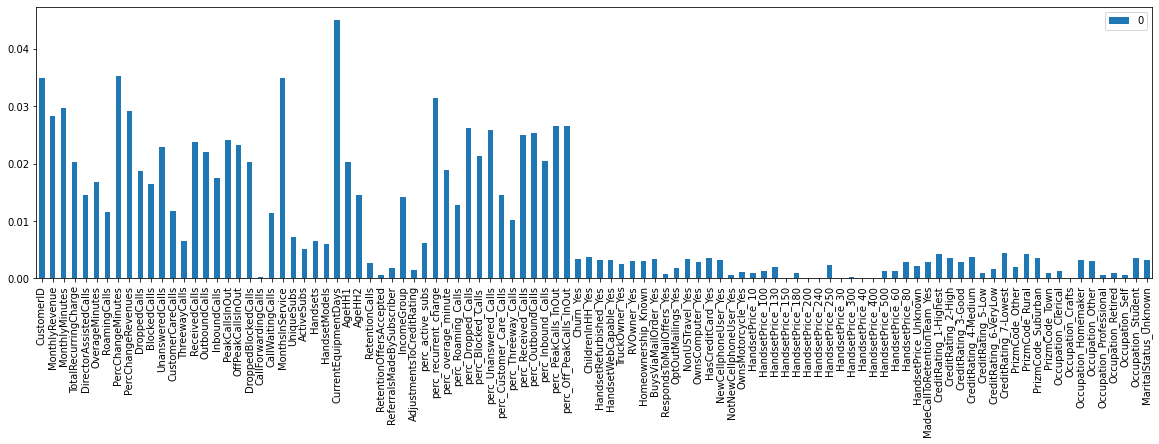

In [123]:
imp_feat.plot(kind = 'bar', figsize=(20, 5))